In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG16  # Pre-trained model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [19]:
path = "/content/drive/MyDrive/dltry/tryy"
classes = os.listdir(path)
print(classes)

['cat', 'dog']


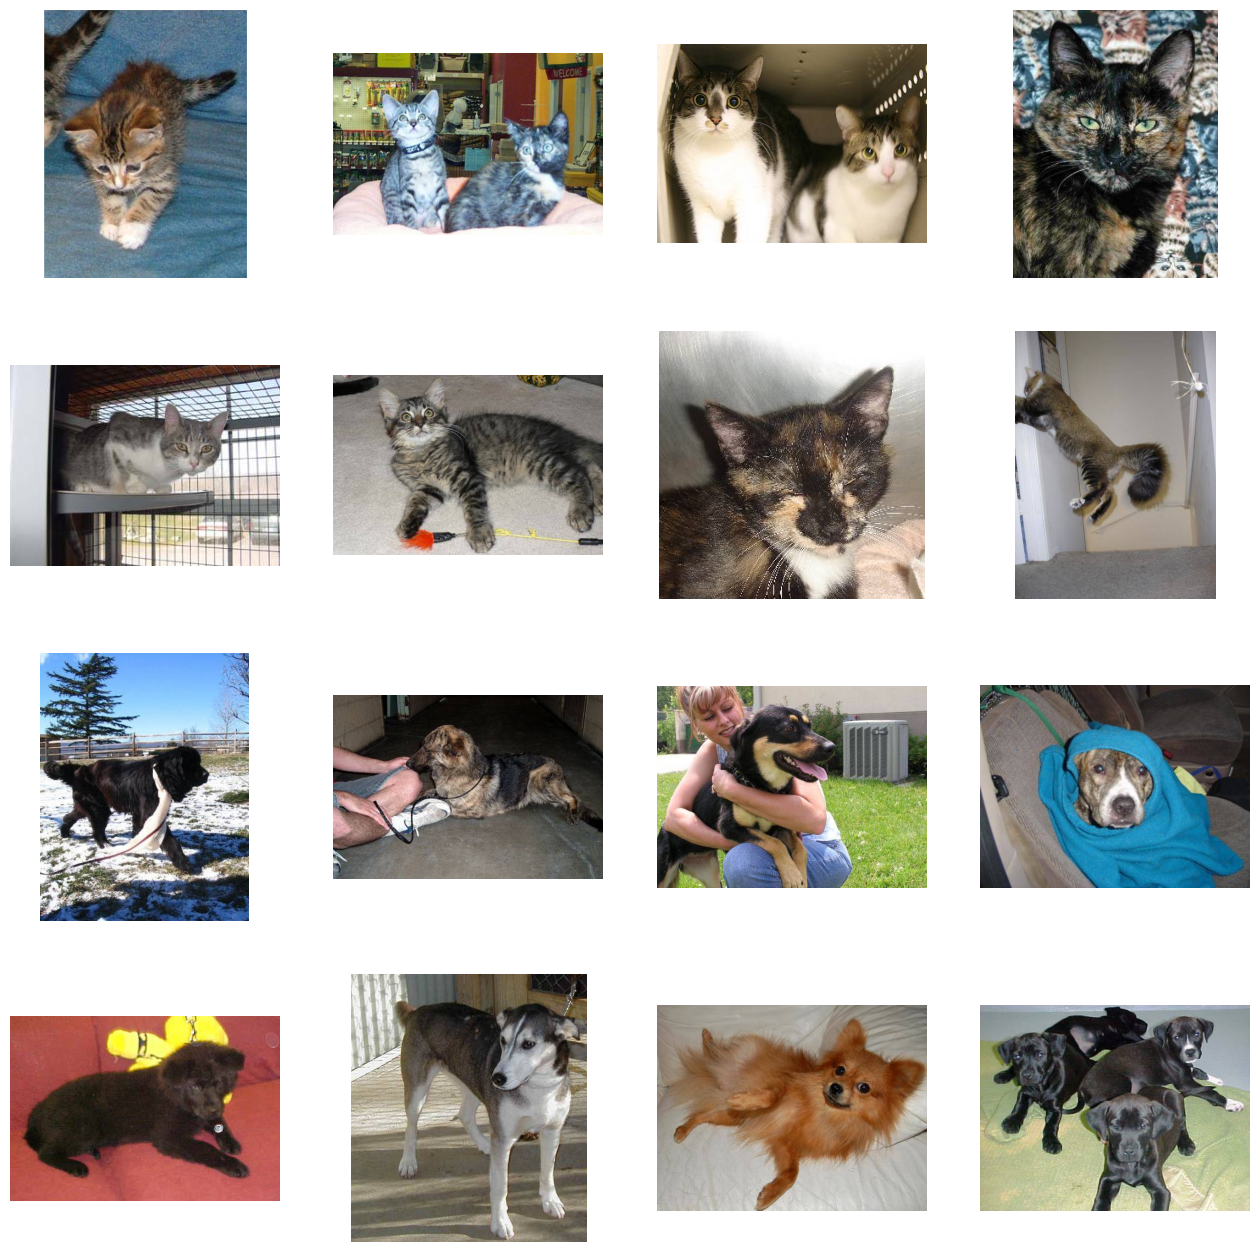

In [20]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join(path, "cat")
dog_dir = os.path.join(path, "dog")
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 300

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [21]:
#Create datasets for training and testing
train_datagen = image_dataset_from_directory(path, image_size=(200,200), subset='training', seed = 1, validation_split=0.1, batch_size=32)

test_datagen = image_dataset_from_directory(path, image_size=(200,200), subset='validation', seed = 1, validation_split=0.1, batch_size=32)

Found 10038 files belonging to 2 classes.
Using 9035 files for training.
Found 10038 files belonging to 2 classes.
Using 1003 files for validation.


In [22]:
# Define the pre-trained model (VGG16) as the base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the layers in the base model
base_model.trainable = False

In [23]:
# Build the model with different hyperparameters
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               9437696   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [25]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [26]:
epochs = 10
batch_size = 64

In [27]:
# Train the model
history = model.fit(train_datagen,
                    epochs=epochs,
                    validation_data=test_datagen,
                    batch_size=batch_size)

Epoch 1/10
283/283 [==============================] - 1192s 4s/step - loss: 2.7546 - accuracy: 0.9186 - val_loss: 0.6743 - val_accuracy: 0.9621
Epoch 2/10
283/283 [==============================] - 45s 157ms/step - loss: 0.7906 - accuracy: 0.9571 - val_loss: 0.2362 - val_accuracy: 0.9701
Epoch 3/10
283/283 [==============================] - 42s 145ms/step - loss: 0.4689 - accuracy: 0.9633 - val_loss: 0.2434 - val_accuracy: 0.9641
Epoch 4/10
283/283 [==============================] - 43s 148ms/step - loss: 0.3329 - accuracy: 0.9727 - val_loss: 0.2250 - val_accuracy: 0.9691
Epoch 5/10
283/283 [==============================] - 46s 157ms/step - loss: 0.2026 - accuracy: 0.9775 - val_loss: 0.2333 - val_accuracy: 0.9611
Epoch 6/10
283/283 [==============================] - 44s 151ms/step - loss: 0.1765 - accuracy: 0.9796 - val_loss: 0.2071 - val_accuracy: 0.9611
Epoch 7/10
283/283 [==============================] - 44s 153ms/step - loss: 0.0910 - accuracy: 0.9854 - val_loss: 0.1492 - val_acc

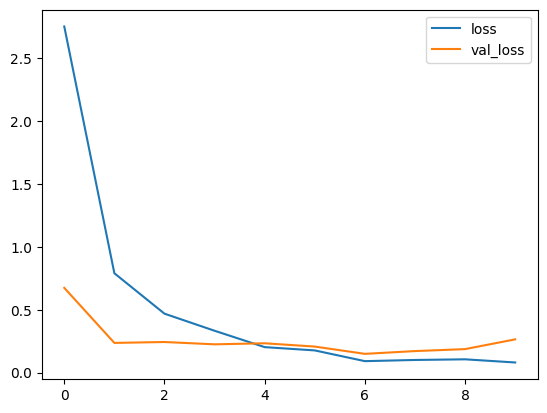

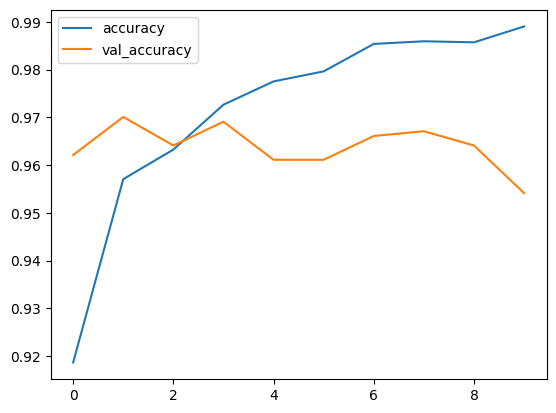

In [28]:
# Plot training history
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [29]:
from keras.preprocessing import image
def predict_image(image_path):
    test_image = image.load_img(image_path, target_size=(200, 200))
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)
    if result >= 0.5:
        print("Dog")
    else:
        print("Cat")

1/1 [==============================] - 0s 18ms/step
Cat


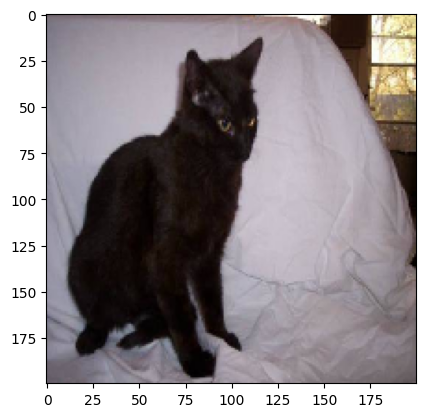

In [31]:
predict_image("/content/drive/MyDrive/dltry/tryy/cat/cat.134.jpg")

1/1 [==============================] - 0s 51ms/step
Dog


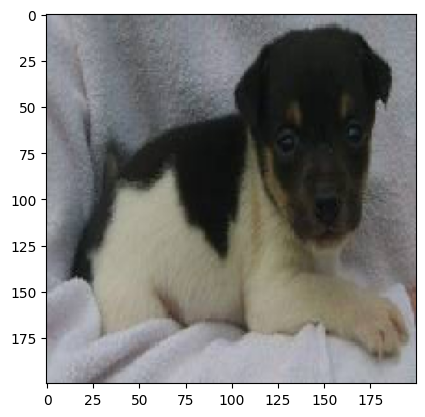

In [33]:
# Test on a dog image
predict_image("/content/drive/MyDrive/dltry/tryy/dog/dog.347.jpg")

In [36]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_datagen)

print("Test Accuracy:", test_accuracy)

# Predict labels for the test dataset
y_pred = model.predict(test_datagen)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to binary predictions

32/32 [==============================] - 5s 120ms/step - loss: 0.2645 - accuracy: 0.9541
Test Accuracy: 0.9541375637054443
32/32 [==============================] - 5s 127ms/step


In [37]:
# Get the true labels from the test dataset
y_true = np.concatenate([y for x, y in test_datagen], axis=0)

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

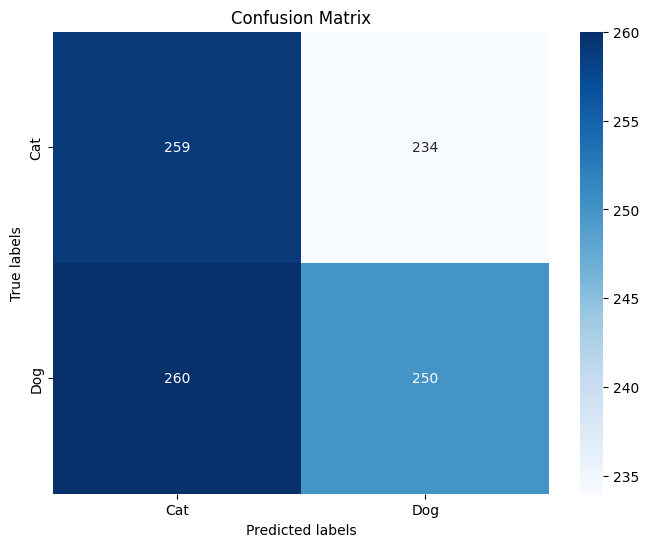

In [40]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()